# Preparing Notebook

## Installing Dependencies

In [ ]:
!pip install pykan --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 1.9 MB/s eta 0:00:00


## Importing Libraries

In [ ]:
#Model Import & EDA
import os
import kagglehub
import pandas as pd
import numpy as np
#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
#Feature preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Model Building
import torch
from kan import *

## Downloading Dataset

In [ ]:
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

100%|██████████| 70.6k/70.6k [00:00<00:00, 12.8MB/s]

Extracting files...


In [ ]:
for files in os.listdir(path):
  if files.endswith('test.csv'):
    df_test = pd.read_csv(os.path.join(path, files))
  elif files.endswith('train.csv'):
    df_train = pd.read_csv(os.path.join(path, files))

# EDA

In [ ]:
df_train.shape, df_test.shape

((2000, 21), (1000, 21))

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


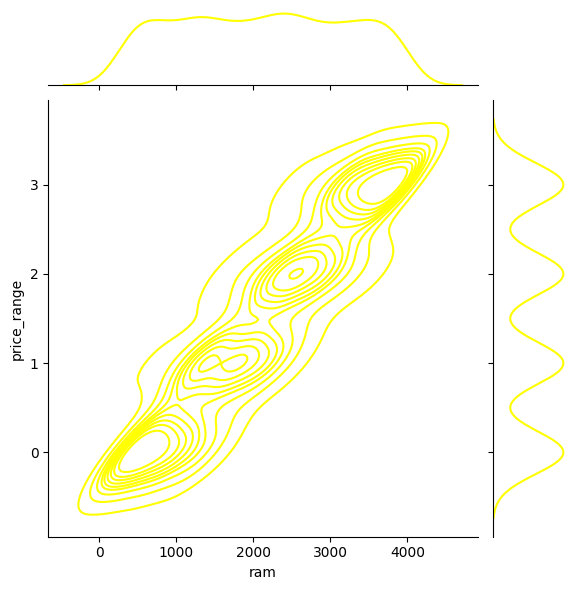

In [ ]:
sns.jointplot(x='ram',y='price_range',data=df_train,color='yellow',kind='kde');

<Axes: >

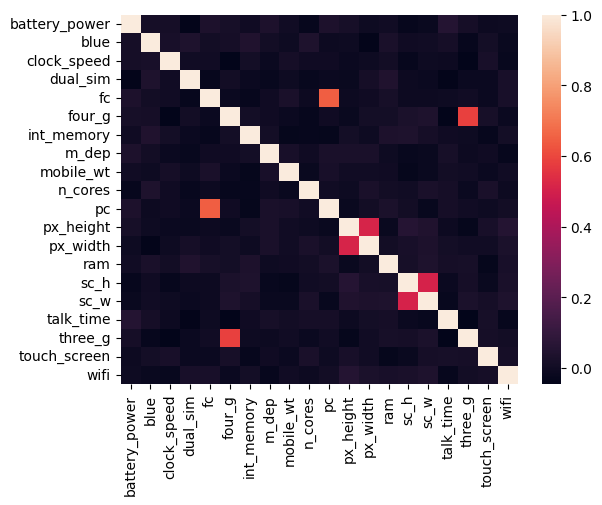

In [ ]:
sns.heatmap(df_train.drop(['price_range'], axis = 'columns').corr())

# Preprocessing

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Feature Scaling

In [ ]:
X = df_train.drop(['price_range'], axis = 'columns')
y = df_train['price_range']
X_unscaled = X[X.nunique().loc[X.nunique().values > 2].index.tolist()]
X_binary = X[X.nunique().loc[X.nunique().values <= 2].index.tolist()]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unscaled)

In [ ]:
X = np.concatenate((X_scaled, X_binary), axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.1, stratify = y)

In [ ]:
X_train.shape, y_test.shape

((1800, 20), (200,))

In [ ]:
dataset = {
    'train_input': torch.tensor(X_train, dtype=torch.float32).to(device),
    'train_label': torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32).to(device),
    'test_input': torch.tensor(X_test, dtype=torch.float32).to(device),
    'test_label': torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32).to(device)
}

# Model Building

In [ ]:
model = KAN(width=[20,8,4], grid=3,k=4,device=device)
# grid = granularity of splines, k = order of the basis functions(B-splines)
results = model.fit(dataset, opt= 'LBFGS', steps=25, lr=0.01, lamb_entropy=2.,)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.33e-01 | test_loss: 2.65e-01 | reg: 3.88e+01 | : 100%|█| 25/25 [00:47<00:00,  1.91s/

saving model version 0.1


## Plotting Visualizations

### Performance on Training and Testing Dataset

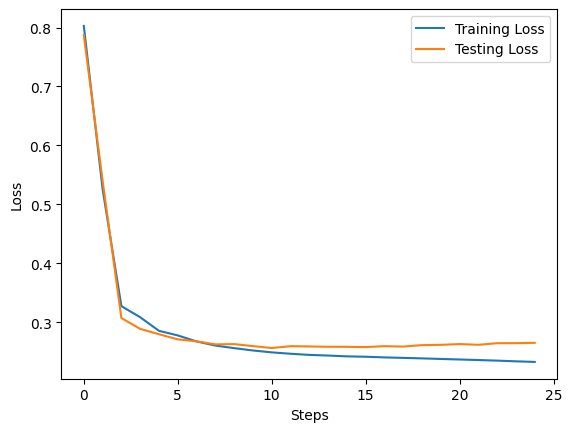

In [ ]:
plt.plot(results['train_loss'], label= 'Training Loss')
plt.plot(results['test_loss'], label= 'Testing Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model Structure

<Figure size 1000x2000 with 0 Axes>

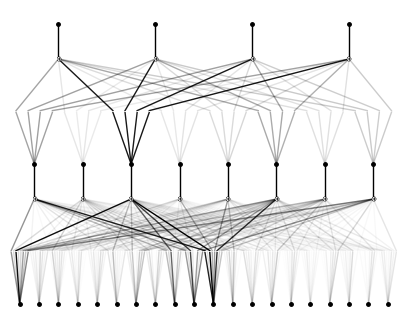

In [ ]:
plt.figure(figsize=(10,20))
model.plot(beta=8)

### Symbolic Model Visualization

In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.9819285273551941, c=1
fixing (0,0,1) with sin, r2=0.9998615980148315, c=2
fixing (0,0,2) with sin, r2=0.9998639225959778, c=2
fixing (0,0,3) with x^2, r2=0.9993805885314941, c=2
fixing (0,0,4) with sin, r2=0.9997119307518005, c=2
fixing (0,0,5) with sin, r2=0.9998122453689575, c=2
fixing (0,0,6) with sin, r2=0.9995301365852356, c=2
fixing (0,0,7) with sin, r2=0.9997080564498901, c=2
fixing (0,1,0) with x, r2=0.9530466794967651, c=1
fixing (0,1,1) with exp, r2=0.9998588562011719, c=2
fixing (0,1,2) with sin, r2=0.9944173097610474, c=2
fixing (0,1,3) with log, r2=0.9997086524963379, c=2
fixing (0,1,4) with sin, r2=0.9996212124824524, c=2
fixing (0,1,5) with x, r2=0.053550031036138535, c=1
fixing (0,1,6) with tanh, r2=0.9998986721038818, c=3
fixing (0,1,7) with sin, r2=0.9999292492866516, c=2
fixing (0,2,0) with x, r2=0.9654853940010071, c=1
fixing (0,2,1) with sin, r2=0.9999123811721802, c=2
fixing (0,2,2) with sin, r2=0.9996628761291504, c=2
fixing (0,2,3) wi

In [ ]:
formula = model.symbolic_formula()[0][0]
ex_round(formula, 4)

0.0498*x_1 + 0.0441*x_10 + 0.0005*x_12 + 0.0065*x_14 + 0.0094*x_15 + 0.0168*x_16 + 0.0231*x_17 - 0.0081*x_18 + 0.02*x_19 + 0.0053*x_2 - 0.0308*x_20 - 0.0025*x_3 + 0.0074*x_4 - 0.004*x_5 - 0.0024*x_6 + 0.007*x_8 + 0.0281*x_9 - 0.0067*(-0.8129*x_10 - 1)**2 + 0.005*(-0.9674*x_11 - 1)**2 + 0.0784*(-0.8931*x_11 - 1)**2 + 0.0042*(-0.9547*x_12 - 1)**2 - 0.003*(-0.6624*x_14 - 1)**2 - 0.0012*(-0.6593*x_3 - 1)**2 - 0.0049*(-0.5893*x_5 - 1)**2 + 0.0075*(-0.8374*x_8 - 1)**2 + 0.0083*exp(0.52*x_2) - 0.0321*exp(0.7606*x_7) + 0.0285*log(5.9355 - 2.1789*x_5) + 1.1495*sin(0.2157*x_1 + 1.824) + 0.2513*sin(0.3175*x_1 + 1.9019) - 0.0334*sin(0.5806*x_1 + 8.593) - 0.0936*sin(0.2865*x_10 + 1.8808) - 0.1438*sin(0.6638*x_10 + 5.4592) + 0.3876*sin(0.2591*x_11 + 1.8679) - 0.1448*sin(0.3385*x_11 + 5.1311) + 0.0443*sin(0.4849*x_13 + 2.0474) - 0.0195*sin(0.5075*x_13 + 2.0889) + 0.062*sin(0.6358*x_13 - 1.3722) + 0.012*sin(0.9786*x_13 - 7.806) - 0.2498*sin(0.2582*x_14 + 5.0647) + 0.0694*sin(0.4505*x_2 + 2.0434) + 0.0

## Model Evaluation

In [ ]:
def accuracy_score(y_true, y_pred):
  y_true = y_true.cpu().numpy() if isinstance(y_true, torch.Tensor) else y_true
  y_pred = y_pred.cpu().numpy() if isinstance(y_pred, torch.Tensor) else y_pred

  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = correct_predictions / total_predictions

  return accuracy

In [ ]:
def accuracy_score(y_true, y_pred):
    y_true = y_true.cpu().numpy() if isinstance(y_true, torch.Tensor) else np.array(y_true)
    y_pred = y_pred.cpu().numpy() if isinstance(y_pred, torch.Tensor) else np.array(y_pred)

    accuracy = np.mean(y_true == y_pred)
    return accuracy

# Model Testing

In [ ]:
y_train_true = torch.argmax(model(dataset['train_input']), dim=1)
y_test_true = torch.argmax(model(dataset['test_input']), dim=1)

In [ ]:
train_predictions = torch.argmax(model(dataset['train_input']), dim=1)
test_predictions = torch.argmax(model(dataset['test_input']), dim=1)

In [ ]:
accuracy_score(y_train_true, train_predictions), accuracy_score(y_test_true, test_predictions)

(1.0, 1.0)

In [ ]:
df_test = df_test.drop(['id'], axis = 'columns')
X_test_unscaled = df_test[df_test.nunique().loc[df_test.nunique().values > 2].index.tolist()]
X_test_binary = df_test[df_test.nunique().loc[df_test.nunique().values <= 2].index.tolist()]

X_test_scaled = scaler.transform(X_test_unscaled)  # Use the same scaler fitted on training data
X_test_processed = np.concatenate((X_test_scaled, X_test_binary), axis=1)

X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32).to(device)

In [ ]:
predictions = model(X_test_tensor)  # Or model.predict(X_test_tensor) if available
predicted_classes = torch.argmax(predictions, dim=1)

In [ ]:
predicted_classes = predicted_classes.cpu().numpy()
predicted_classes

array([2, 2, 0, 2, 1, 2, 2, 2, 3, 1, 0, 3, 3, 2, 3, 3, 0, 3, 3, 3, 0, 1,
       1, 0, 1, 2, 3, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 3, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 3, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0,
       3, 0, 1, 0, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 3,
       2, 1, 1, 3, 1, 3, 3, 1, 3, 2, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 1, 3,
       3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 3, 2, 0, 0,
       2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 3, 0, 1, 1, 1, 2, 2, 1,
       2, 0, 3, 3, 2, 0, 0, 2, 1, 0, 3, 1, 1, 1, 1, 0, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 3, 1, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 3, 1, 0,
       2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 3, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 3, 3, 1, 3, 2, 0, 1, 0, 2, 2, 1,
       1, 1, 2, 0, 0, 1, 2, 1, 3, 1, 2, 2, 1, 2, 1,